
**Problem Name:** *A diabetes prediction problem using different types of Machine Learning (ML) algorithms and Neural Networks.*

**Objectives:**
1. To acquire knowledge how to build a neural network in Python.
2. To learn about the activation function in the hidden and classification layer of the neural network.
3. To know how to compile a neural network(NN) model using loss function, optimizer and accuracy metrics.

In [ ]:
# Downloading the data
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-17 03:21:06--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-17 03:21:06--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6178813647578fd9b46b8dd628.dl.dropboxusercontent.com/cd/0/inline/Bb_i0kx3mfGCEwoSriZrbv8w-LclmVvmVM2WodL2-0F-uovsyVLiXe-E43_5ofQPaFpiTehNNUMCiXT6n0vr0DgjkosJUQbBx8S4p76_YY4VO6kjGLWgNp2A7w-EwJ9Xxw7IHldCbH_g5_KHLq06dBn0/file# [following]
--2021-12-17 03:21:06--  https://uc6178813647578fd9b46b8dd628.dl.dropboxusercontent.com/cd/0/inline/Bb_i0kx3mfGCEwoSriZrbv8w-LclmVvmVM2WodL2-0F-uovsyVLiXe-E43_5ofQPaFpiTehNNUMCiXT6n0

**Showing the task dataset**

In [ ]:
import pandas as pd
dataset = pd.read_csv('diabetes.csv')
dataset # To show the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Pre-processing:**
1. First of all, all the entries in the diabetes dataset are viewed in which no categorical column is found and no missing value is present in the dataset. That's why,handling missing value is not required for this task dataset.
2. Using the 'head', 'shape' and 'describe' function, the dataset is further viewed.
3. The summation of null value in each column is viewed which is 0 as there is no null value and the data types of each column are also shown.
4. The features column(8) and the target (Outcome) column are separated.
5. Exploratory data analysis is performed on this dataset using klib library in which the highest co-rrelated feature column is found to be 'glucose'(0.47) with the target column.
6. Before training the developed ML and NN models, train-test splitting and feature scaling is performed.

**Algorithms:**
1. Logistic Regression (LR)
2. K Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree Classifier (DT)
5. Random Forest Classifier (RF)
6. Naive Bayes (NB)
7. Neural Network (NN)

**Showing some of the first entries of the dataset**

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Showing the shape of the dataset (rows, columns)**

In [ ]:
dataset.shape

(768, 9)

**Showing the summary functions of each column**

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Showing the null column if any (no null value)**

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Showing the data types of each column in the dataset**

In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Number of rows in 'Insulin' column having '0' value**

In [ ]:
dataset[dataset.Insulin==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


**Number of rows in 'SkinThickness' column having '0' value**

In [ ]:
dataset[dataset.SkinThickness==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


**Seperating the features column and the target column of the task dataset**

In [ ]:
# Creating Feature Columns
features = dataset[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']]
# Creating Target Columns
target = dataset[['Outcome']]

**Showing the '1' label(268 out of 768) in target column 'Outcome'**

In [ ]:
dataset[dataset.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


**Showing the '0' label(500 out of 768) in target column 'Outcome'**

In [ ]:
dataset[dataset.Outcome==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


**Exploratory Data Analysis:**

In [ ]:
! pip install klib
import klib

**To show the co-rrelation of the features columns with target column**

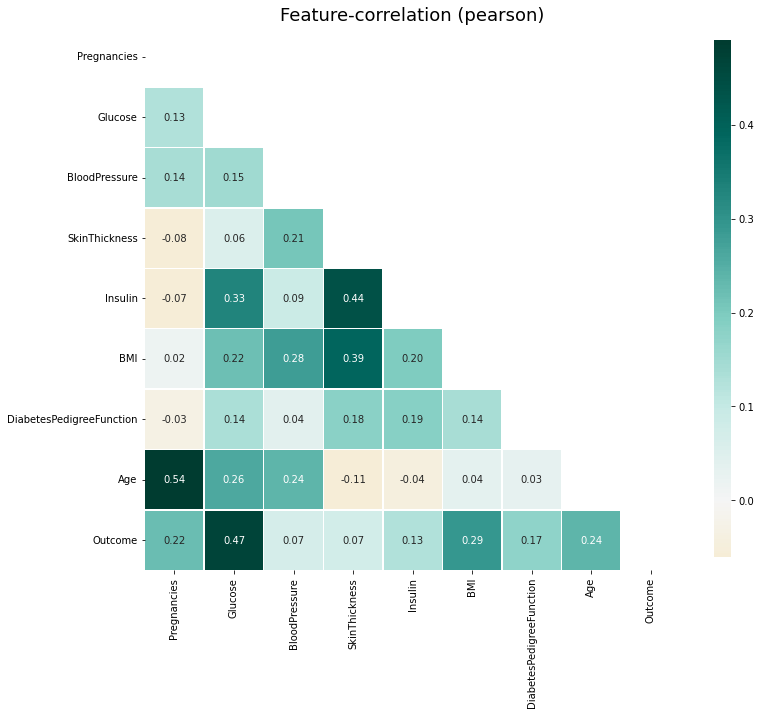

In [ ]:
klib.corr_plot(dataset)

In [ ]:
klib.corr_mat(dataset) # This returns a color-encoded correlation matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

**No null value in 'age' column**

In [ ]:
dataset[dataset.Age. isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Peroformance measure of all 6 Machine Learning Classification Algorithms**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.20,random_state = 0)
print("The shape of train set",X_train.shape)
print("The shape of test set",X_test.shape)

X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train) #Fitting into the training set
y_pred1 = lr.predict(X_test) # prediction on the test model
conf1=confusion_matrix(y_test,y_pred1) # Making the confusing matrix (actual vs prediction)
print(conf1)
print('The performnace measurement of the logistic regression: \n ',classification_report(y_test,y_pred1,target_names = ['No','Yes']))

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
print(conf2)
print('The performnace measurement of the KNN classifier:\n ',classification_report(y_test,y_pred2,target_names = ['No','Yes']))

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
y_pred3 = classifier.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
print(conf3)
print('The performnace measurement of the SVC classifier:\n ',classification_report(y_test,y_pred3,target_names = ['No','Yes']))

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
print(conf4)
print('The performnace measurement of the Decision Tree classifier:\n ',classification_report(y_test,y_pred4,target_names = ['No','Yes']))

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state = 2)
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
print(conf5)
print('The performnace measurement of the RF classifier:\n ',classification_report(y_test,y_pred5,target_names = ['No','Yes']))

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred6 = classifier.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
print(conf6)
print('The performnace measurement of the Naive bayes classifier:\n ',classification_report(y_test,y_pred6,target_names = ['No','Yes']))

The shape of train set (614, 8)
The shape of test set (154, 8)
[[98  9]
 [18 29]]
The performnace measurement of the logistic regression: 
                precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[88 19]
 [21 26]]
The performnace measurement of the KNN classifier:
                precision    recall  f1-score   support

          No       0.81      0.82      0.81       107
         Yes       0.58      0.55      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154

[[98  9]
 [18 29]]
The performnace measurement of the SVC classifier:
                precision    recall  f1-score   support

      

**Importing Library for Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**Building the NN Model**

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 20)                180       
                                                                 
 dense_55 (Dense)            (None, 18)                378       
                                                                 
 dense_56 (Dense)            (None, 15)                285       
                                                                 
 dense_57 (Dense)            (None, 10)                160       
                                                                 
 dense_58 (Dense)            (None, 8)                 88        
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,100
Trainable params: 1,100
Non-train

**Train-Test Split and Feature Scaling**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.20,random_state = 0)
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

**Compiling the model ('Adam' optimizer, epoch=20)**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Training the neural network on the train dataset
history3 = model.fit(X_train, y_train, epochs=20, validation_split=0.08)

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 4.5087 - val_accuracy: 0.6800
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.3697 - val_accuracy: 0.7000
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9947 - val_loss: 4.3031 - val_accuracy: 0.6800
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9965 - val_loss: 4.5077 - val_accuracy: 0.7000
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9911 - val_loss: 4.3698 - val_accuracy: 0.7000
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9929 - val_loss: 4.4116 - val_accuracy: 0.6800
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9929 - val_loss: 4.8956 - val_accuracy: 0.6600
Epoch 8/20
18/18 [=

**Plotting the loss and validation loss of the dataset**

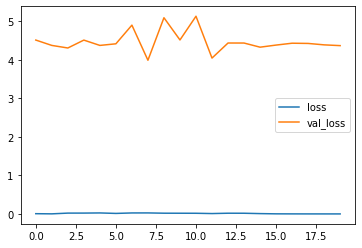

In [ ]:
history_df = pd.DataFrame(history3.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

**Plotting the accuracy and validation accuracy of the dataset**

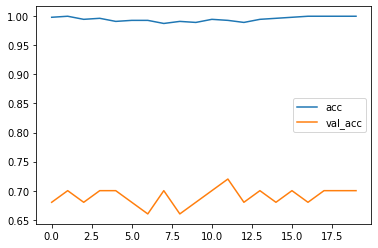

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()

**Prediction on the test dataset using the developed NN model (adam)**

In [ ]:
#Prediction
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.58      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



**Compiling the model ('Adadelta' optimizer, epoch=30)**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
#Training the neural network on the train dataset
history1 = model.fit(X_train, y_train, epochs=30, validation_split=0.15)

Epoch 1/30
17/17 [==============================] - 1s 16ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5422 - val_accuracy: 0.7742
Epoch 2/30
17/17 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5422 - val_accuracy: 0.7742
Epoch 3/30
17/17 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5422 - val_accuracy: 0.7742
Epoch 4/30
17/17 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5423 - val_accuracy: 0.7742
Epoch 5/30
17/17 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5423 - val_accuracy: 0.7742
Epoch 6/30
17/17 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5423 - val_accuracy: 0.7742
Epoch 7/30
17/17 [==============================] - 0s 7ms/step - loss: 0.3338 - accuracy: 0.8618 - val_loss: 0.5424 - val_accuracy: 0.7742
Epoch 8/30
17/17 [=

**Plotting the loss and accuracy of training and validation( adadelta optimizer)**

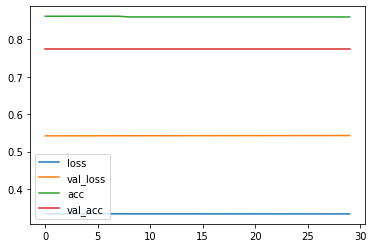

In [ ]:
history1_df = pd.DataFrame(history1.history)
plt.plot(history1_df['loss'], label='loss')
plt.plot(history1_df['val_loss'], label='val_loss')
plt.legend()
plt.plot(history1_df['accuracy'], label='acc')
plt.plot(history1_df['val_accuracy'], label='val_acc')
plt.legend()

**Prediction on the test dataset using the developed NN model (adadelta)**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred1 = model.predict(X_test)
y_pred1 = y_pred1 > 0.5
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



**Compiling the model ('Rmsprop' optimizer, epoch=70)**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#Training the neural network on the train dataset
history2 = model.fit(X_train, y_train, epochs=70, validation_split=0.12)

Epoch 1/70
17/17 [==============================] - 1s 18ms/step - loss: 0.3474 - accuracy: 0.8463 - val_loss: 0.5681 - val_accuracy: 0.7838
Epoch 2/70
17/17 [==============================] - 0s 6ms/step - loss: 0.3432 - accuracy: 0.8481 - val_loss: 0.5744 - val_accuracy: 0.7838
Epoch 3/70
17/17 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 0.8481 - val_loss: 0.5643 - val_accuracy: 0.7838
Epoch 4/70
17/17 [==============================] - 0s 6ms/step - loss: 0.3411 - accuracy: 0.8537 - val_loss: 0.5755 - val_accuracy: 0.7703
Epoch 5/70
17/17 [==============================] - 0s 7ms/step - loss: 0.3378 - accuracy: 0.8519 - val_loss: 0.5867 - val_accuracy: 0.7703
Epoch 6/70
17/17 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.8500 - val_loss: 0.5833 - val_accuracy: 0.7703
Epoch 7/70
17/17 [==============================] - 0s 7ms/step - loss: 0.3362 - accuracy: 0.8556 - val_loss: 0.5860 - val_accuracy: 0.7838
Epoch 8/70
17/17 [=

**Plotting the loss and accuracy of training and validation( rmsprop optimizer)**

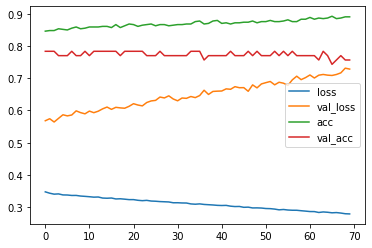

In [ ]:
history2_df = pd.DataFrame(history2.history)
plt.plot(history2_df['loss'], label='loss')
plt.plot(history2_df['val_loss'], label='val_loss')
plt.legend()
plt.plot(history2_df['accuracy'], label='acc')
plt.plot(history2_df['val_accuracy'], label='val_acc')
plt.legend()

**Prediction on the test dataset using the developed NN model (rmsprop)**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred2 = model.predict(X_test)
y_pred2 = y_pred2 > 0.5
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



**Accuracy and loss curve with classifiaction report altogether of all NN models**

The performance measure of NN model with 'adam' optimizer
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.58      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

The performance measure of NN model with 'adadelta' optimizer
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154

The performance measure of NN model with 'rmsprop' optimizer
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

<Figure size 432x288 with 0 Axes>

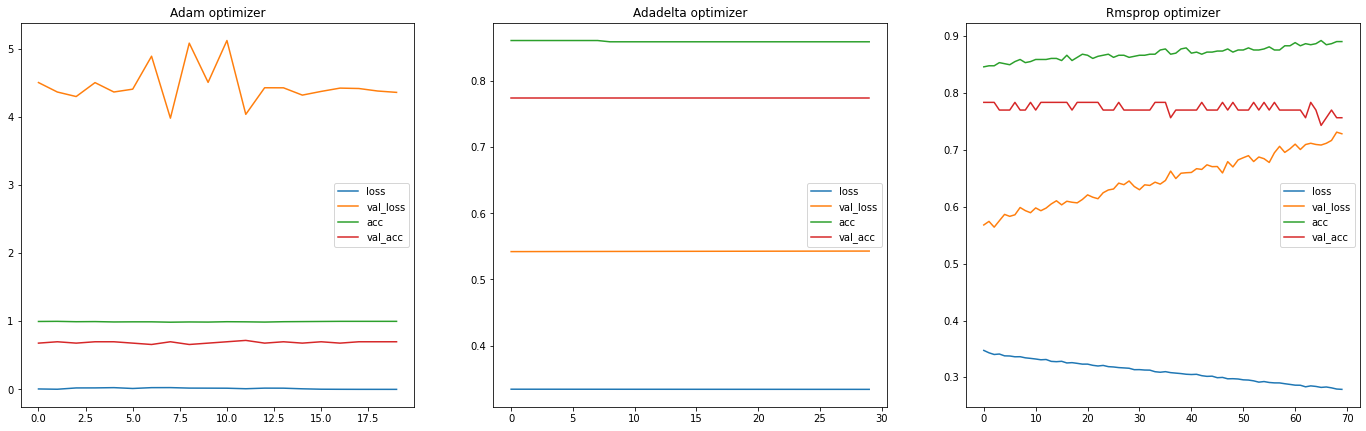

In [ ]:
plt.figure()
plt.figure(figsize=(24, 24))
plt.subplot(3, 3, 1)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Adam optimizer')
plt.subplot(3, 3, 2)
plt.plot(history1_df['loss'], label='loss')
plt.plot(history1_df['val_loss'], label='val_loss')
plt.legend()
plt.plot(history1_df['accuracy'], label='acc')
plt.plot(history1_df['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Adadelta optimizer')
plt.subplot(3, 3, 3)
plt.plot(history2_df['loss'], label='loss')
plt.plot(history2_df['val_loss'], label='val_loss')
plt.legend()
plt.plot(history2_df['accuracy'], label='acc')
plt.plot(history2_df['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Rmsprop optimizer')
print("The performance measure of NN model with 'adam' optimizer\n",classification_report(y_test,y_pred))
print("The performance measure of NN model with 'adadelta' optimizer\n",classification_report(y_test,y_pred1))
print("The performance measure of NN model with 'rmsprop' optimizer\n",classification_report(y_test,y_pred2))

**2nd NN model with less model parameters**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                180       
                                                                 
 dense_51 (Dense)            (None, 18)                378       
                                                                 
 dense_52 (Dense)            (None, 8)                 152       
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 719
Trainable params: 719
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
16/16 [==============================] - 1s 18ms/step - loss: 1.6906 - accuracy: 0.5971 - val_loss: 1.1272 - val_accuracy: 0.4508
Epoch 2/80
16/16 [============================

<Figure size 432x288 with 0 Axes>

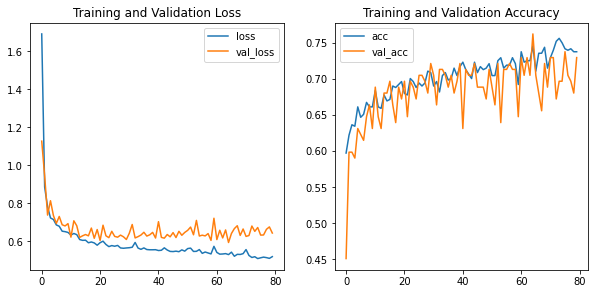

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.21,random_state = 2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Training the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=80, validation_split=0.2)
plt.figure()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.subplot(2, 2, 2)
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Training and Validation Accuracy')
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
print(classification_report(y_test,y_pred))

**Findings:**
1. Using all the 6 machine learning algorithms(KNN, RF, DT, SVM, LR, NB), the highest accuracy and F1-score is found from the SVM classifier model (82%). This is due to the fact that the hyperplane separating the surface area in the SVM has better performance on the test data than the other classifiers.

2. The 1st neural network model is bulit in which 'relu' and 'tanh' activation function is utilized in the hidden layer of the NN.

3. The input dimension in the 1st layer of the NN is given as 8 as there are 8 features column and in the last classification layer 1 hidden neuron (node) is given. In the classification layer, sigmoid activation function is employed as this is a binary classification problem indicating whether have diabetes or not.

4. The 1st NN model is trained with different types of parameters. They are given below:

      1. Optimizer: "Adam", Epoch:20, validation split: 0.08 (train:80% and test:20%)
      2. Optimizer: "Adadelta", Epoch:30, validation split: 0.15
      3. Optimizer: "Rmsprop", Epoch:70, validation split: 0.12   

5. The all 3 NN models obtained accuracy is 75%, 79% and 78%
respectively. But, it can be observed from the accuracy curve that the difference between the training and validation accuracy is high which can lead to a overfitted model. This is due to the fact the number of layers in NN model is more considering the binary classification problem which leads to more number of trainable parameters(1100).

6. In the 2nd developed NN model (test=0.21), the obtained accuracy is 73% in which 'adam' optimizer is utilized and the difference between the training and validation accuracy is not much considering the 1st NN model. This is due to that fact that in the 2nd NN model(trainable parameters=719), the number of layers is comparatively less than the 1st NN model.




**Discussion:**
1. While training the NN model with 'adam' optimizer the default learning rate value of this optimizer is utilized which is 0.001.

2. As this is a binary(0 or 1) prediction problem, binary crossentropy loss is used in the compilation of the developed NN model. This is also referred to as log loss.

3. Using the threshold value of 0.5, the floating value of y pred is converted to an integer. This can also be done by converting to 'uint8', which represents an unsigned integer.

4. In NN models, in addition to the training and testing sets, the validation set is used to fine-tune the model's hyper-parameters before making the final prediction on the test set. There is no validation set in ML models.

